# Evaluation of Clustering Performance
We search for the optimal number of clusters for the Iris data set using several measures for clustering evaluation. First, we load all the libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

Next, we set the maximum value of k and the list of values of k that we will check.

In [2]:
random_state = 1234
max_k = 15
k_values = np.arange(2,max_k+1,1)

Load the Iris dataset

In [3]:
# import some data to play with
iris = datasets.load_iris()
target = np.array(iris.target)

# 
x = iris.data[:, :4]
y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

List of the measures we will check.

In [26]:
score_funcs = [
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
    metrics.mutual_info_score,
    metrics.calinski_harabaz_score,
    metrics.fowlkes_mallows_score,
    metrics.homogeneity_completeness_v_measure,
    metrics.silhouette_score
]

For every value of k, we apply k-means clustering and then evaluate all the metrics.

In [27]:
### generate a list for every metric
scores = {}
for score_func in score_funcs:
    if score_func!=metrics.homogeneity_completeness_v_measure:
        scores[score_func.__name__] = []
scores['homogeneity'] = []
scores['completeness'] = []
scores['v_measure'] = []

for k in k_values:
    yp = KMeans(n_clusters=k, random_state=random_state).fit_predict(x)
    for score_func in score_funcs:
        if score_func == metrics.calinski_harabaz_score:
            scores[score_func.__name__].append(score_func(x,yp))
        elif score_func == metrics.silhouette_score:
            scores[score_func.__name__].append(score_func(x,yp))
        elif score_func == metrics.homogeneity_completeness_v_measure:
            h,c,v = score_func(y,yp)
            scores['homogeneity'].append(h)
            scores['completeness'].append(c)
            scores['v_measure'].append(v)
        else:
            scores[score_func.__name__].append(score_func(y, yp))

Plot all the metrics.

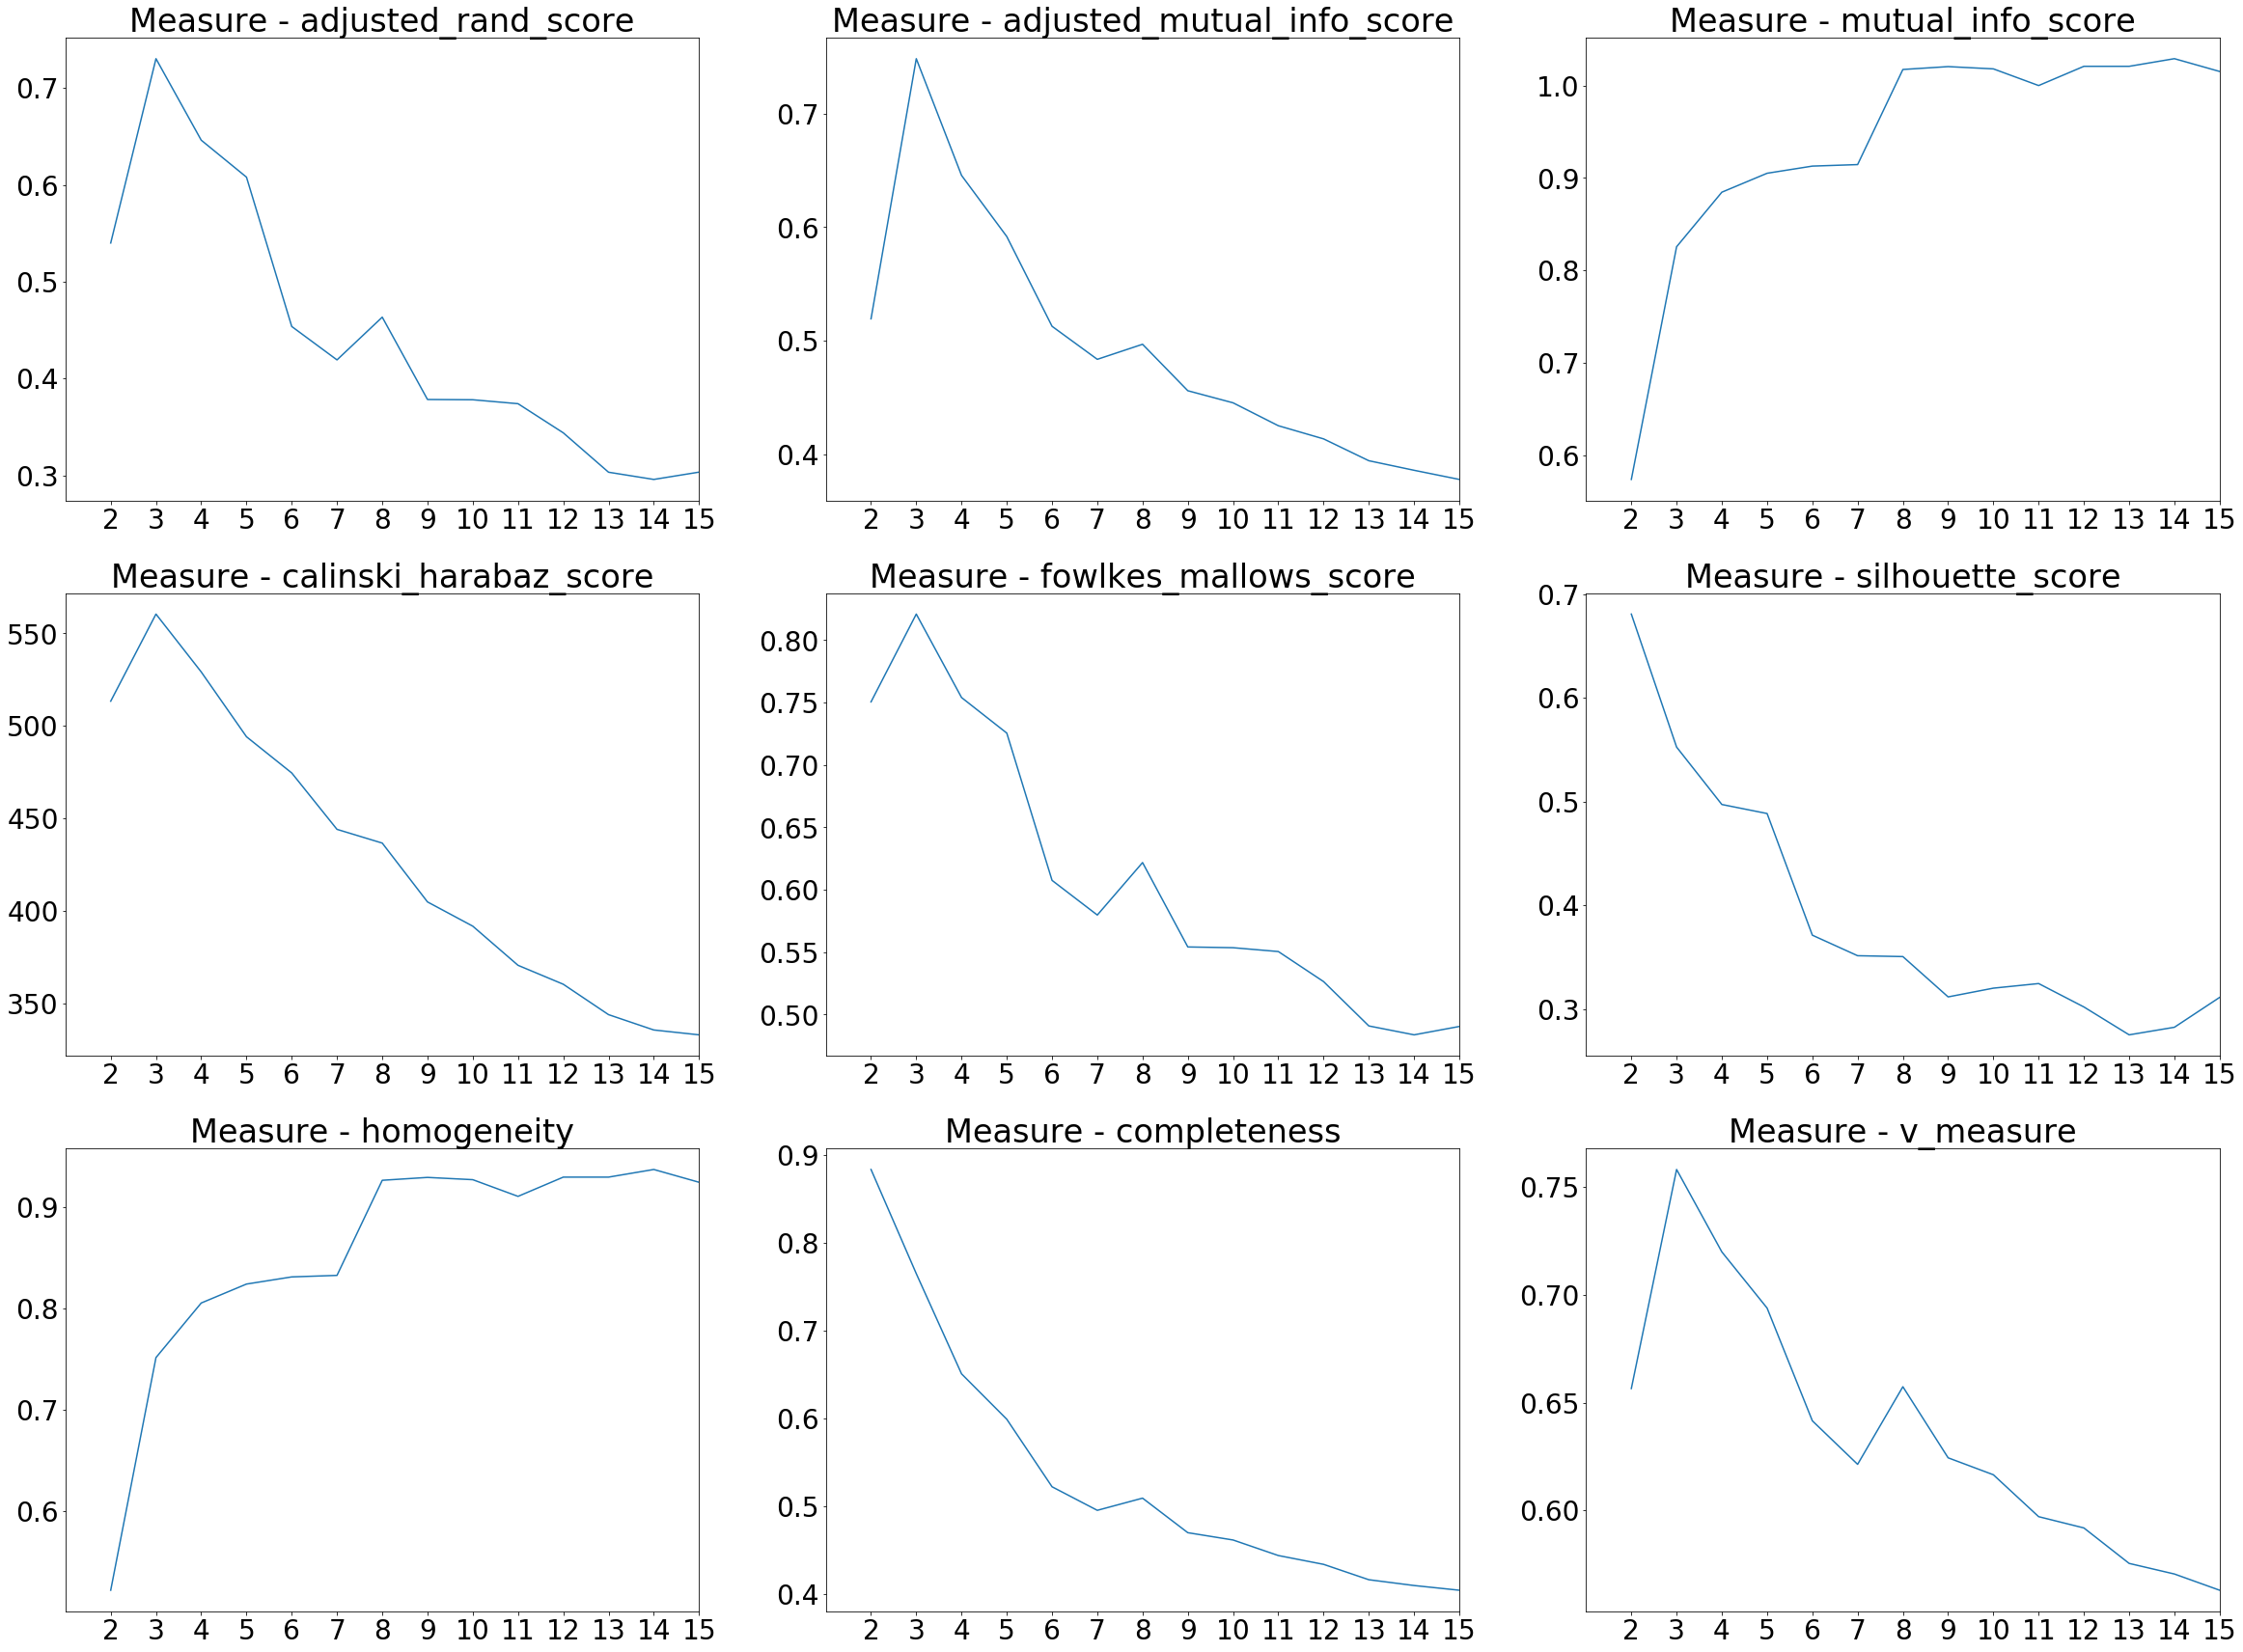

In [28]:
f, axarr = plt.subplots(3, 3)

plt.rcParams['figure.figsize'] = (40.0, 30.0)
font = {'family' : 'sans', 'size'   : 28}
plt.rc('font', **font)

for i,s in enumerate(scores):
    axarr[int(i/3),int(i%3)].set_xlim([1,max_k])
    axarr[int(i/3),int(i%3)].set_xticks(k_values)
    axarr[int(i/3),int(i%3)].set_title("Measure - "+s)
    axarr[int(i/3),int(i%3)].plot(k_values,scores[s])
    